In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress


In [2]:
video_game = pd.read_csv("/Users/applewang/Desktop/June Datacamp/Video_Games_Sales_as_at_22_Dec_2016.csv")
xbox1 = pd.read_csv("/Users/applewang/Desktop/June Datacamp/Xbox One Sales.csv")
ps4 = pd.read_csv("/Users/applewang/Desktop/June Datacamp/PS4 Sales.csv")


In [3]:
video_gameworatings = video_game[['Name','Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
video_gameworatings.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
ps4['Platform'] = 'PS4'
ps4 = ps4.rename(columns = {'Game':'Name', 'Year':'Year_of_Release', 'North America':'NA_Sales', 'Europe':'EU_Sales', 'Japan':'JP_Sales', 'Rest of World': 'Other_Sales', 'Global':'Global_Sales'})
ps4 = ps4[['Name','Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
# ps4 = ps4[['Game': "Name", 'Platform', 'Year':'Year_of_Release', "Genre", "Publisher", "North America":"NA_Sales"]]
ps4.head()


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Grand Theft Auto V,PS4,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,PS4,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,PS4,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,PS4,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [5]:
xbox1['Platform'] = 'Xbox One'
xbox1 = xbox1.rename(columns = {'Game':'Name', 'Year':'Year_of_Release', 'North America':'NA_Sales', 'Europe':'EU_Sales', 'Japan':'JP_Sales', 'Rest of World': 'Other_Sales', 'Global':'Global_Sales'})
xbox1 = xbox1[['Name','Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
# ps4 = ps4[['Game': "Name", 'Platform', 'Year':'Year_of_Release', "Genre", "Publisher", "North America":"NA_Sales"]]
xbox1.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Grand Theft Auto V,Xbox One,2014.0,Action,Rockstar Games,4.70,3.25,0.01,0.76,8.72
1,Call of Duty: Black Ops 3,Xbox One,2015.0,Shooter,Activision,4.63,2.04,0.02,0.68,7.37
2,Call of Duty: WWII,Xbox One,2017.0,Shooter,Activision,3.75,1.91,0.00,0.57,6.23
3,Red Dead Redemption 2,Xbox One,2018.0,Action-Adventure,Rockstar Games,3.76,1.47,0.00,0.54,5.77
4,MineCraft,Xbox One,2014.0,Misc,Microsoft Studios,3.23,1.71,0.00,0.49,5.43


In [6]:
dataframes = [video_gameworatings, ps4, xbox1]
mergeddata = pd.concat(dataframes)
mergeddata = mergeddata.loc[mergeddata['Year_of_Release']<=2016]
mergeddata

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
590,Alekhine's Gun,Xbox One,2016.0,Action,Maximum Games,0.00,0.00,0.00,0.00,0.00
593,Super Dungeon Bros,Xbox One,2016.0,Action,Wired Productions,0.00,0.00,0.00,0.00,0.00
594,Pro Cycling Manager 2016,Xbox One,2016.0,Sports,Focus Home Interactive,0.00,0.00,0.00,0.00,0.00
599,We Sing (2016),Xbox One,2016.0,Music,THQ Nordic,0.00,0.00,0.00,0.00,0.00


In [7]:
publisher_count = mergeddata.groupby('Publisher')['Year_of_Release'].count()
publisher_info = pd.DataFrame(publisher_count)
publisher_info = publisher_info.rename(columns={'Year_of_Release': '# of Games Released'})
publisher_info = publisher_info.reset_index()
publisher_total_NA = mergeddata.groupby('Publisher')['NA_Sales'].sum()
publisher_total_EU = mergeddata.groupby('Publisher')['EU_Sales'].sum()
publisher_total_JP = mergeddata.groupby('Publisher')['JP_Sales'].sum()
publisher_total_Other = mergeddata.groupby('Publisher')['Other_Sales'].sum()
publisher_total_Global = mergeddata.groupby('Publisher')['Global_Sales'].sum()
publisher_info = pd.merge(publisher_info, publisher_total_NA, on = "Publisher")
publisher_info = pd.merge(publisher_info, publisher_total_EU, on = "Publisher")
publisher_info = pd.merge(publisher_info, publisher_total_JP, on = "Publisher")
publisher_info = pd.merge(publisher_info, publisher_total_Other, on = "Publisher")
publisher_info = pd.merge(publisher_info, publisher_total_Global, on = "Publisher")
publisher_info.sort_values(by='Global_Sales', ascending = False).head(20)

,Publisher,# of Games Released,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
386,Nintendo,700,815.86,418.58,457.74,94.55,1786.72
150,Electronic Arts,1375,616.82,402.08,15.63,136.10,1170.91
25,Activision,1028,467.90,242.01,7.79,86.05,803.83
491,Sony Computer Entertainment,710,282.12,204.36,75.79,86.34,648.53
573,Ubisoft,1000,278.56,191.72,8.68,57.94,537.09
534,Take-Two Interactive,423,223.69,119.95,5.93,55.95,405.50
527,THQ,712,207.55,93.66,5.01,31.87,338.11
296,Konami Digital Entertainment,840,91.30,71.74,92.48,30.63,286.35
373,Namco Bandai Games,984,78.27,50.21,130.51,17.44,276.54
479,Sega,641,109.29,81.36,57.30,24.04,272.20


In [8]:
def  stats(a, b):
    quartilesval = a.quantile([.25, .5, .75])
    lowerq = quartilesval[.25]
    upperq = quartilesval[.75]
    iqr = upperq-lowerq
    lowerbound = lowerq - (iqr*1.5)
    upperbound = upperq + (iqr*1.5)
    upperoutliers = b.loc[a >= upperbound]
    loweroutliers = b.loc[a <= lowerbound]
    outliers=pd.concat([upperoutliers, loweroutliers])
    print(f'The statistical analysis states that there are {len(outliers)} outliers')
    print(f'the upper bound is {upperbound} and the lower bound is {lowerbound}')
    

def linearregress(x,y,a,b):
    (slope, intercept, rvalue, pvalue, stderr)=linregress(x,y)
    regress_values = x * slope + intercept
    line_eq = 'y=' + str(round(slope,2)) +'x+' + str(round(intercept,2))
    plt.scatter(x,y, color='blue')
    plt.plot(x,regress_values,"r-")
    print(f'The r-square is {rvalue}')
    print(line_eq)
    plt.annotate(line_eq,(a,b),fontsize=15, color='red')
    plt.grid()
    
    
   

The statistical analysis states that there are 91 outliers
the upper bound is 3.9287500000000017 and the lower bound is -2.261250000000001
The r-square is 0.8078174644284765
y=0.72x+-4.61


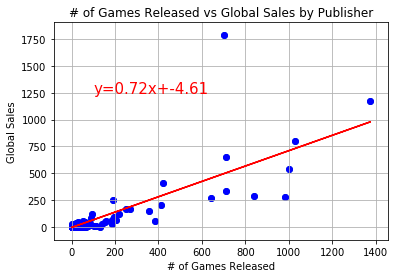

In [9]:
x_release = publisher_info['# of Games Released']
y_global_sales = publisher_info['Global_Sales']
plt.scatter(x_release,y_global_sales)
stats(publisher_info['Global_Sales'], publisher_info)
plt.xlabel('# of Games Released')
plt.ylabel('Global Sales')
plt.title('# of Games Released vs Global Sales by Publisher')
linearregress(x_release, y_global_sales, 100, 1250)


In [10]:
mergeddata.sort_values(by="NA_Sales", ascending = False).head(40)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77
14,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,15.00,4.89,0.24,1.69,21.81
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92
18,Super Mario World,SNES,1990.0,Platform,Nintendo,12.78,3.75,3.54,0.55,20.61


In [12]:
#global sale of each genre
genre_counts = mergeddata["Genre"].value_counts()
genre_counts

Action              3513
Sports              2406
Misc                1787
Role-Playing        1558
Shooter             1387
Adventure           1350
Racing              1276
Platform             908
Simulation           876
Fighting             868
Strategy             688
Puzzle               581
Action-Adventure      49
Music                 24
Visual Novel           6
MMO                    5
Name: Genre, dtype: int64

Text(0.5, 1.0, 'Total genre Count')

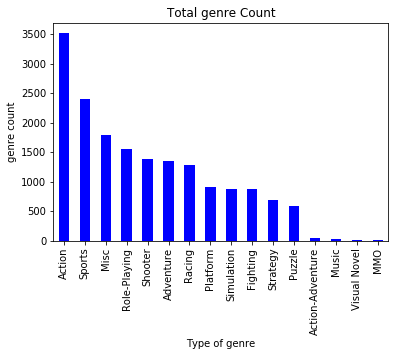

In [14]:
x_axis = genre_counts.index
y_axis = genre_counts.values
genre_counts.plot(kind = "bar", facecolor='blue')
plt.ylabel("genre count")
plt.xlabel("Type of genre")
plt.title("Total genre Count")
